# LAB 05.01 - Predictions impact

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [23]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.01", varname="student");

logging in as jandres.toro1@udea.edu.co... please wait

-------------
using course session ai4eng.v1.udea.r3::2025.1
success!! you are logged in
-------------


## Task 1. Compute PNL from strategy

observe the following signal `s`, and model trend predictions `p` (not perfect predictions!!)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
s = np.round((np.random.normal(size=20)*5+.5).cumsum()+100,2)
p = (np.random.random(size=len(s)-1)>.3).astype(int)
print (s.shape, p.shape)

(20,) (19,)


SIGNAL     [94.32 91.32 91.86 92.09 85.77 81.77 85.14 87.15 84.49 75.72 81.01 91.39
 90.53 84.46 80.52 80.28 87.65 99.14 95.7  97.52]
PREDICTION [1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1]


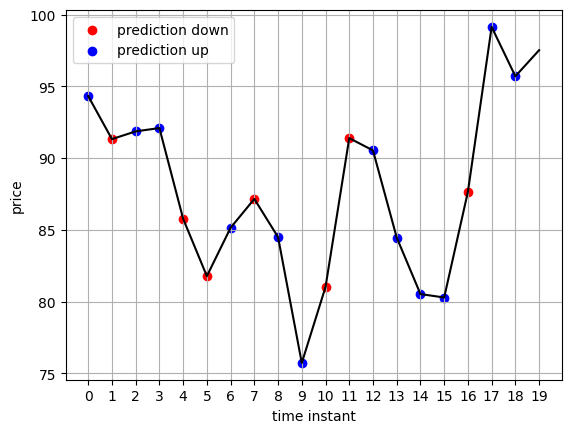

In [4]:

plt.plot(s, color="black")
plt.scatter(np.arange(len(p))[p==0], s[:-1][p==0], color="red", label="prediction down")
plt.scatter(np.arange(len(p))[p==1], s[:-1][p==1], color="blue", label="prediction up")
plt.grid(); plt.legend(); plt.xlabel("time instant"); plt.ylabel("price")
plt.xticks(range(len(s)), range(len(s)))
pd.DataFrame(np.vstack((s,list(p)+[np.nan])), index=["signal", "prediction"])
print ("SIGNAL    ", s)
print ("PREDICTION", p)


fill in the `pnl` variable below with a list of 19 values corresponding on applying the same strategy as in the notes, buying or selling always ONE money unit:

- if the prediction is zero, we believe the price is going down, so we sell ONE money unit at the current price and buy it at the next instant of time
- if the prediction is one, we do the opposite
- BUT there is a **commission** of 1%, applied on the instant you make the first operation (which uses the current price)

observe that there are 20 signal points, and 19 predictions.

you can use your tool of choice (Excel, Python, etc.) to compute your answer

**HINT**: Understand each component of the expression for `perfect_prediction` below to try to obtain your answer with Python.



**For instance**: the following signal and predictions:

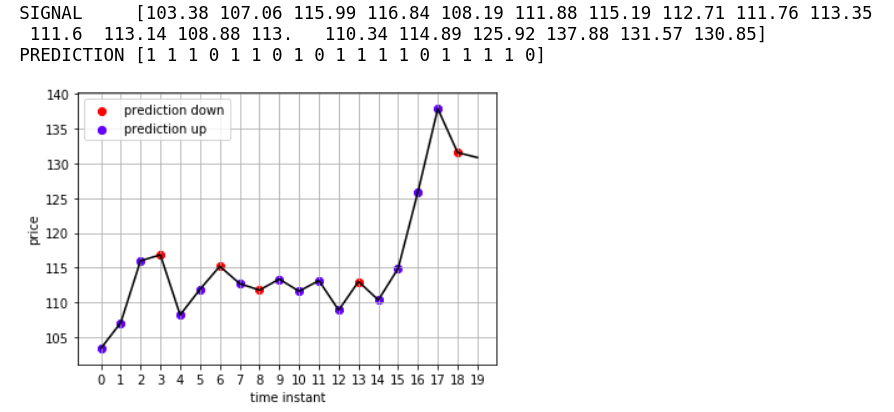

In [5]:

from IPython.display import Image
Image("local/imgs/timeseries-prediction.png", width=600)


produce the following set of PNL

     2.65 7.86 -0.31 7.48 2.61 2.19 1.33 -2.08 -2.71 -2.88 0.42 -5.39 3.03 1.53 3.45 9.88 10.70 -7.69 -0.60
     
- at `t=0` the PNL is $(107.06-103.38)\times 1 - 103.38\times 1 \times .01=2.65$, since the prediction was correct
- at `t=2` the PNL is $(116.84-115.99)\times 1 - 115.99\times 1 \times .01=-0.31$, since the prediction was correct, BUT the price difference is small and the commission overcomes the profit.
- at `t=7` the PNL is $(111.76 - 112.71)\times1 - 112.71\times1\times.01=-2.08$, since the prediction was incorrect


in the expressions above, the first term is the net profit or loss, and the second one is due to the commission. Multiplication by $1$ simply signals we are trading ONE unit.

also, observe that the following python code, will generate a perfect prediction signal, which, when applied to our strategy, will result in a list of all positive PNLs.

In [8]:
perfect_prediction = (s[1:]>s[:-1]).astype(int)
perfect_prediction

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

**CHALLENGE 1** (not mandatory): make your answer in python

**hints**:

    s[1:]            will give you all elements of s except the first one
    s[:-1]           will give you all elements of s except the last one
    s[1:] - s[:-1]   will give you the difference of price in one time with respect to the next one
    (p-0.5)*2        will convert vector p (containing 0's and 1's) into a vector of -1's and +1's

**fill in the following variable**

In [10]:
import numpy as np

# SIGNAL (s): Precios o puntos de datos del activo
s = np.array([92.88, 90.96, 94.72, 89.5, 87.1, 94.69, 87.64, 87.08, 85.47, 88.02, 90.72, 97.44, 99.37, 94.65, 91.76, 97.29, 93.15, 95.55, 102.04, 106.61])

# PREDICTION (p): Señales de la estrategia (1=comprar/long, 0=vender/short)
p = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

# Comisión por operación
commission_rate = 0.01 # 1%

In [12]:
# Convertir las predicciones de 0 y 1 a -1 y 1
# 1 -> 1 (buy/long)
# 0 -> -1 (sell/short)
strategy_signal = (p - 0.5) * 2

# Calcular los cambios de precio de un periodo a otro
# Esto representa el retorno bruto si se mantiene el activo
price_changes = s[1:] - s[:-1]

# Verificar las dimensiones:
# price_changes tendrá len(s) - 1 = 19 valores
# strategy_signal tiene 19 valores
# Esto es consistente con la tarea de 19 valores de PNL.

In [13]:
pnl = []
for i in range(len(strategy_signal)):
    action = strategy_signal[i]
    price_diff = price_changes[i]
    initial_price_of_period = s[i] # Precio al inicio del periodo para calcular la comisión

    # PNL bruto (sin comisión)
    gross_pnl = price_diff * action

    # Costo de la comisión (solo si hay operación, es decir, action es 1 o -1)
    # Según el ejemplo, la comisión se aplica sobre el precio en s[i]
    commission_cost = initial_price_of_period * commission_rate

    # PNL neto del periodo
    net_pnl = gross_pnl - commission_cost

    pnl.append(round(net_pnl, 2)) # Redondeamos a 2 decimales como en los ejemplos

# La variable 'pnl' final es la lista de 19 valores
pnl_final = np.array(pnl)

**submit your answer**

In [14]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Simulated prediction signal

given the following signal, produce a synthetic prediction signal with the given percentage of correct predictions.

observe that `s` has length 21, but your synthetic prediction will have a length of 20.

fill in the variable `prediction`, with a list with 20 zeros or ones, containing a prediction with `acc` correct predictions.

for instance, with the following signal

        [100.37 102.92 102.69 104.57 105.06  97.9  103.   100.32  97.59 107.07
         112.19 106.32 104.14 100.3   97.03 107.28 100.36 100.99 111.48 117.07
         126.04]
         
the following predictions:

        p = [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]
        
produce a trend prediction accuracy of 60% (`acc=0.6`)

**HINT**: Do it in Python

- use the perfect prediction from the exercise above to start with.
- use `np.random.permutation`

for instance:

In [33]:

# a list
a = np.r_[10,20,30,40,50,60,70,80,90]

# 3 positions randomly chosen
k = np.random.permutation(len(a)-1)[:3]
print (k)

# changing the value of the items on those positions
a[k] = a[k] + 1
a


[7 1 5]


array([10, 21, 30, 40, 50, 61, 70, 81, 90])

**your signal and target accuracy to achieve**

In [35]:

s = ((np.random.normal(size=21)*5+.5).cumsum()+100).round(2)
acc = np.round(np.random.random()*.9+.1, 1)
print ("YOUR SIGNAL", s)
print ("THE ACCURACY YOUR SYNTHETIC PREDICTIONS MUST ACHIEVE: ", acc)


YOUR SIGNAL [108.5  104.52 112.62 114.59 115.13 109.16 113.17 104.69 106.93 115.24
 118.67 123.23 117.73 112.94 115.83 106.62  99.33  99.41 104.54 105.34
 114.4 ]
THE ACCURACY YOUR SYNTHETIC PREDICTIONS MUST ACHIEVE:  0.2


In [36]:
# --- ESTOS VALORES LOS OBTIENES EJECUTANDO EL NOTEBOOK ---
# Ejemplo de 's' (tu s real será diferente)
s_example = s

# Ejemplo de 'acc' (tu acc real será diferente, supongamos 0.7 para este ejemplo)
acc_example = acc
# --------------------------------------------------------

# 1. Determinar los movimientos reales (la "verdad")
true_movements = (s_example[1:] > s_example[:-1]).astype(int)
# print("Movimientos reales (true_movements):", true_movements)
# print("Longitud de true_movements:", len(true_movements)) # Debería ser 20

# 2. Calcular el número de predicciones correctas necesarias
num_correct_predictions = int(round(acc_example * len(true_movements)))
# print(f"Número de predicciones correctas necesarias para acc={acc_example}: {num_correct_predictions}")

# 3. Construir my_synthetic_prediction
my_synthetic_prediction = np.copy(true_movements) # Empezamos con todas correctas

# Calcular cuántas predicciones incorrectas necesitamos
num_incorrect_predictions = len(true_movements) - num_correct_predictions

# Si necesitamos introducir predicciones incorrectas:
if num_incorrect_predictions > 0:
    # Elegir índices al azar para "voltear" la predicción y hacerla incorrecta
    # Aseguramos que elegimos índices únicos
    incorrect_indices = np.random.choice(len(true_movements), num_incorrect_predictions, replace=False)

    for idx in incorrect_indices:
        my_synthetic_prediction[idx] = 1 - my_synthetic_prediction[idx] # Voltear 0 a 1 o 1 a 0

# Convertir a lista de Python si es requerido por el ejercicio
my_synthetic_prediction_list = my_synthetic_prediction.tolist()

print("\nLa variable `my_synthetic_prediction` para este ejemplo (con acc={}) sería:".format(acc_example))
print(my_synthetic_prediction_list)

# Opcional: Verificar la precisión de tu señal generada
actual_correct_count = np.sum(my_synthetic_prediction == true_movements)
actual_accuracy = actual_correct_count / len(true_movements)
print(f"Precisión real de tu señal generada: {actual_accuracy:.2f}")


La variable `my_synthetic_prediction` para este ejemplo (con acc=0.2) sería:
[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Precisión real de tu señal generada: 0.20


**submit your answer**

In [37]:
student.submit_task(globals(), task_id="task_02");

## Task 3: ML Metric vs Business Metric

now, your are given a signal (length=21) and you will have to create

- an array of 9 rows x 20 columns with synthetic predictions so that the first row (row number zero in python) has accuracy of 10%, the second has 20%, etc.
- a list of 9 numbers containing the PNL of using the synthetic predictions on the above array as input for a trading strategy.

for instance, for this signal:

    [101.33,  96.75,  98.2 ,  95.3 ,  97.96,  98.75,  92.46,  82.2 , 78.61,  80.  ,  
      88.78,  98.72, 103.22, 113.65, 103.89, 107.36, 114.6 , 103.9 , 108.71, 104.2 , 107.8 ]

you will have to create the following variables:

    pset = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
                     [1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
                     [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
                     [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                     [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
                     [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
                     [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
                     [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]])

    
    pnl = np.array([-121.5, -69.44, -62.90, -46.72, -4.08, -19.04, 23.5, 41.0, 77.02])
    
**NOTE**: Specify your PNL rounded to **TWO** decimal places

In [40]:
s = ((np.random.normal(size=21)*5+.5).cumsum()+100).round(2)
s

array([102.33, 108.53, 103.87, 112.4 , 113.27, 103.27, 100.86, 101.03,
       103.25, 105.31, 110.07, 110.73, 114.02, 119.44, 122.79, 125.41,
       117.41, 114.08, 111.87, 113.49, 117.95])

In [41]:
import numpy as np

# --- 1. Obtén tu 's' real ejecutando la celda en tu notebook Colab ---
# Si no quieres usar el ejemplo, reemplaza s_example con el 's' que obtienes de tu notebook
s = s_example # Usar el 's' que obtenga de mi ejecución o el ejemplo si es solo para mostrar

# Comisión
commission_rate = 0.01 # 1%

# 2. Calcular los movimientos reales del mercado (la "verdad" sube/baja)
# Si s[i+1] > s[i], entonces el precio subió (1), de lo contrario, bajó o se mantuvo (0).
true_movements = (s[1:] > s[:-1]).astype(int)
num_periods = len(true_movements) # Esto será 20

# Los niveles de precisión que cada fila de pset debe alcanzar
accuracy_levels = np.arange(0.1, 1.0, 0.1).round(1) # [0.1, 0.2, ..., 0.9]

pset = [] # Lista para almacenar las 9 filas de predicciones
pnl_list = [] # Lista para almacenar los 9 valores de PNL

# 3. Generar pset (array de predicciones sintéticas)
for acc in accuracy_levels:
    num_correct_predictions = int(round(acc * num_periods))
    num_incorrect_predictions = num_periods - num_correct_predictions

    # Crear una fila de predicciones
    synthetic_prediction_row = np.copy(true_movements)

    # Si necesitamos introducir predicciones incorrectas, voltea algunas al azar
    if num_incorrect_predictions > 0:
        incorrect_indices = np.random.choice(num_periods, num_incorrect_predictions, replace=False)
        for idx in incorrect_indices:
            synthetic_prediction_row[idx] = 1 - synthetic_prediction_row[idx] # Voltear 0 a 1 o 1 a 0

    pset.append(synthetic_prediction_row)

pset = np.array(pset) # Convertir la lista de filas a un array NumPy 9x20

# 4. Calcular pnl para cada fila de pset
# Reutilizamos la lógica de PNL de la Tarea 1

# Calcular los cambios de precio de un periodo a otro
price_changes = s[1:] - s[:-1]

for i in range(pset.shape[0]): # Iterar a través de cada una de las 9 filas en pset
    current_prediction_row = pset[i, :] # La fila actual de predicciones (0s y 1s)

    # Convertir las predicciones de 0 y 1 a -1 y 1 para la acción de la estrategia
    strategy_signal = (current_prediction_row - 0.5) * 2

    current_pnl_total = 0.0
    for j in range(num_periods): # Iterar sobre los 20 periodos de la fila
        action = strategy_signal[j]
        price_diff = price_changes[j]
        initial_price_of_period = s[j] # Precio al inicio del periodo para calcular la comisión

        gross_pnl = price_diff * action
        commission_cost = initial_price_of_period * commission_rate

        net_pnl = gross_pnl - commission_cost
        current_pnl_total += net_pnl # Acumular el PNL para la fila

    pnl_list.append(round(current_pnl_total, 2)) # Redondear el PNL total de la fila y añadirlo

pnl = np.array(pnl_list) # Convertir la lista de PNLs a un array NumPy de 9 elementos

print("--- Respuesta de la Tarea 3 ---")
print("\nVariable 'pset' (9x20 array de predicciones sintéticas con diferentes accuracies):")
print(pset)
print("\nVariable 'pnl' (9 elementos array de PNLs acumulados para cada fila de pset):")
print(pnl)

--- Respuesta de la Tarea 3 ---

Variable 'pset' (9x20 array de predicciones sintéticas con diferentes accuracies):
[[1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0]
 [1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0]
 [1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0]
 [0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0]
 [1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0]
 [0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0]
 [0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1]
 [1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1]]

Variable 'pnl' (9 elementos array de PNLs acumulados para cada fila de pset):
[-105.36  -85.66  -69.38  -28.68  -24.28    9.04   14.96   12.54   66.14]


**submit your answer**

In [42]:
student.submit_task(globals(), task_id="task_03");

### understand accuracy vs. PNL

- what is the minimum accuracy from which a model might be profitable?
- and if the commision changes?

Text(0, 0.5, 'PNL')

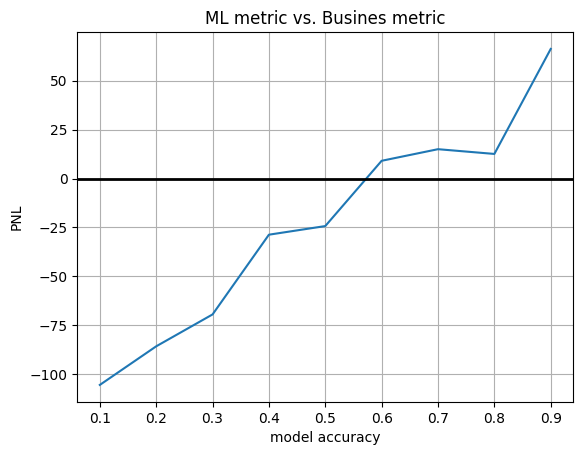

In [43]:

accuracies = np.linspace(.1,.9,9)
plt.plot(accuracies, pnl)
plt.axhline(0, color="black", lw=2)
plt.title("ML metric vs. Busines metric")
plt.grid(); plt.xlabel("model accuracy"); plt.ylabel("PNL")
